In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Santa FE
#hist = pd.read_csv('egade.csv')

### CEDETEC
this_week = pd.read_csv('this_week.csv')
last_week = pd.read_csv('last_week.csv')
hist = pd.concat([this_week,last_week])

In [2]:
hist = hist.reset_index(drop=True)
hist.columns = ['date','Total_kW']

In [3]:
hist['date'] = pd.to_datetime(hist.date)

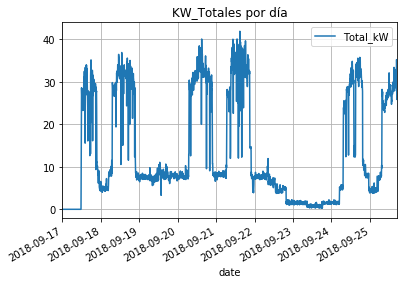

In [4]:
a = hist.plot(x = 'date', y = 'Total_kW' , grid = True, title = 'KW_Totales por día')

In [5]:
prom = []
acc = 0
cycles = 20

for i,val in enumerate(hist.Total_kW):
    a = val
    for j in range(cycles):
        acc += hist.Total_kW[i+j]
    
    mobile =  acc/cycles
    
    prom.append(mobile)
    
    acc = 0
    if i == (len(hist.Total_kW) - cycles):
        for i in range(cycles-1):
            prom.append(0)
        break
    

In [6]:
len(prom),len(hist.Total_kW)

(2509, 2509)

In [7]:
hist['mob_avrg'] = prom

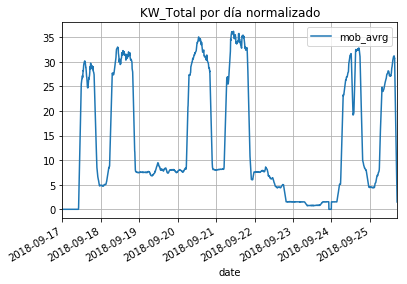

In [8]:
a = hist.plot(x = 'date', y = 'mob_avrg' , grid = True, title = 'KW_Total por día normalizado')

In [9]:
hist['hora'] = pd.to_datetime(hist.date).dt.strftime('%H')
hist['mes'] =  pd.to_datetime(hist.date).dt.strftime('%m')
hist['dia'] =  pd.to_datetime(hist.date).dt.strftime('%w')
hist['año'] = pd.to_datetime(hist.date).dt.strftime('%Y')
hist['minuto'] = pd.to_datetime(hist.date).dt.strftime('%M')

In [10]:
inputs = hist.drop(['mob_avrg','Total_kW','date'],axis=1)
output = hist.drop(['date','Total_kW','hora','mes','dia','año','minuto'],axis=1)

In [11]:
inputs.mes = inputs.mes.astype('float64') 
inputs.dia = inputs.dia.astype('float64')
inputs.año = inputs.año.astype('float64') 
inputs.hora = inputs.hora.astype('float64') 
inputs.minuto = inputs.minuto.astype('float64') 

In [12]:
y = output.as_matrix()
x = inputs.as_matrix()

In [13]:
y = y.ravel()

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)

In [16]:
x_data = tf.placeholder(shape=[None,5],dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],dtype=tf.float32)

In [17]:
W1 = tf.Variable(tf.random_normal(shape=[5,10]))
b1 = tf.Variable(tf.random_normal(shape=[10]))
hidden_1 = tf.nn.relu(tf.add(tf.matmul(x_data,W1),b1))

In [18]:
W15 = tf.Variable(tf.random_normal(shape=[10,7]))
b15 = tf.Variable(tf.random_normal(shape=[7]))
hidden_15 = tf.nn.relu(tf.add(tf.matmul(hidden_1,W15),b15))

In [19]:
W2 = tf.Variable(tf.random_normal(shape=[7,2]))
b2 = tf.Variable(tf.random_normal(shape=[2]))
hidden_2 = tf.nn.tanh(tf.add(tf.matmul(hidden_15,W2),b2))

In [20]:
W3 = tf.Variable(tf.random_normal(shape=[2,1]))
b3 = tf.Variable(tf.random_normal(shape=[1]))
output = tf.nn.relu(tf.add(tf.matmul(hidden_2,W3),b3))

In [21]:
loss = tf.reduce_mean(tf.square(y_target-output))

In [22]:
optimizer = tf.train.GradientDescentOptimizer(0.005)
train_step = optimizer.minimize(loss)

In [23]:
batch_size = 50

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    train_loss = []
    test_loss = []
    
    for i in range(0,200):
        random_index = np.random.choice(len(x_train),size=batch_size)
        random_x = x_train[random_index]
        random_y = np.transpose([y_train[random_index]])
        sess.run(train_step, feed_dict = {x_data:random_x,
                                         y_target: random_y})
        
        tempTrainLoss = sess.run(loss, feed_dict = {x_data: random_x,
                                                   y_target: random_y})
        
        tempTestLoss = sess.run(loss, feed_dict = {x_data: x_test,
                                                   y_target: np.transpose([y_test])})
        
        
        train_loss.append(sess.run(tf.sqrt(tempTrainLoss)))
        test_loss.append(sess.run(tf.sqrt(tempTestLoss)))
    
    
  

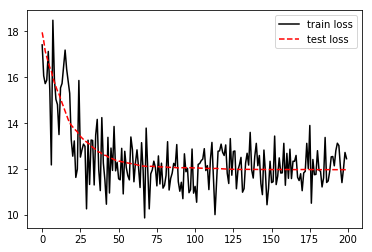

In [24]:
plt.plot(train_loss, 'k-', label='train loss')
plt.plot(test_loss, 'r--', label='test loss')
plt.legend(loc='upper right')
plt.show()

In [25]:
imp = x.astype(int)
out = y.astype(int)

In [26]:
from sklearn import svm

clf = svm.SVC()

clf.fit(imp,out)  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
from sklearn.externals import joblib
joblib.dump(clf, 'predictorr.joblib') 

['predictorr.joblib']

In [28]:
clf2 = joblib.load('predictorr.joblib') 
wet = clf2.predict(imp)

In [29]:
wet

array([1, 1, 1, ..., 0, 0, 0])

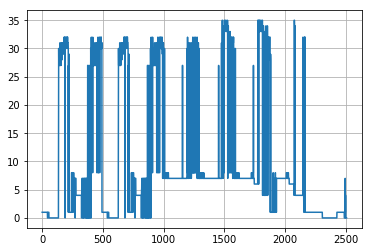

In [30]:
plt.plot(wet)
plt.grid()